# Libraries and Data

In [63]:
# Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt


In [5]:
# Load the data
# Date format is YYYY-MM-DD
df = pd.read_csv('../nyc_data.csv', index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [6]:
# Renaming Variable
df = df.rename(columns={'Demand': 'y'})
df.head()

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


# Data Analysis 

In [8]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


# Seasonal Decomposition

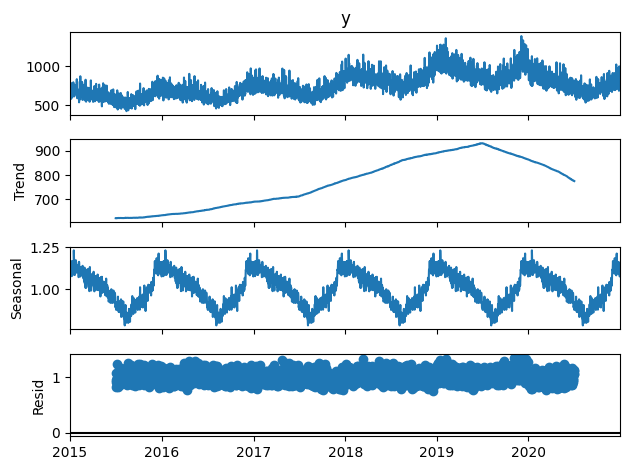

In [31]:
# decomposition
decomposition = seasonal_decompose(x = df.y, 
                                   model='multiplicative' ,period=365)
decomposition.plot(observed=True);


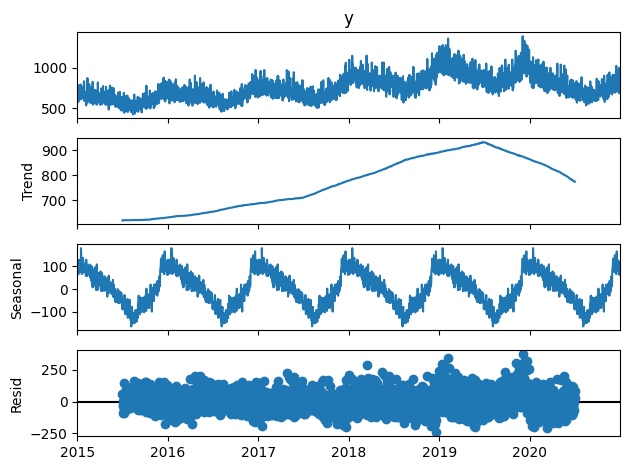

In [28]:
# decomposition additive
decomposition = seasonal_decompose(x = df.y, 
                                   model='additive' ,period=365)
decomposition.plot(observed=True);

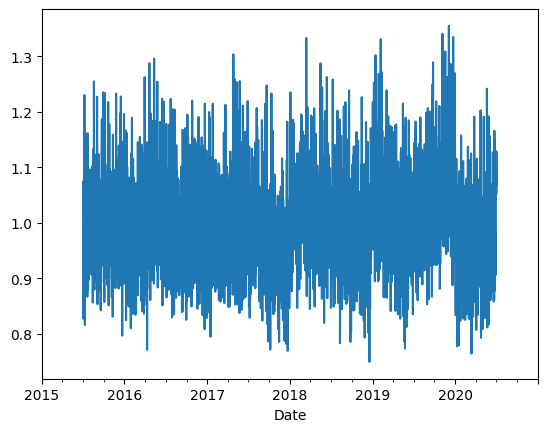

In [32]:
# Plottig
decomposition.resid.plot();

In [34]:
# Resample Data based on Data Frequency
df.y.resample(rule='MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

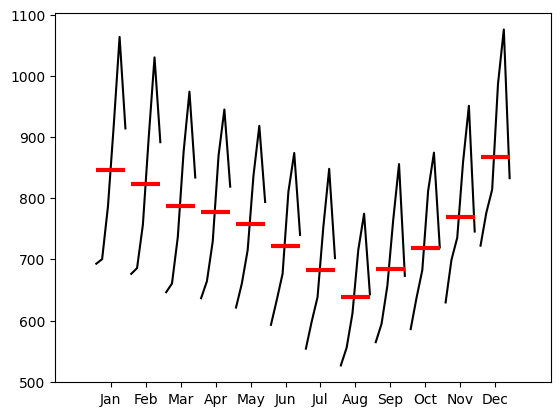

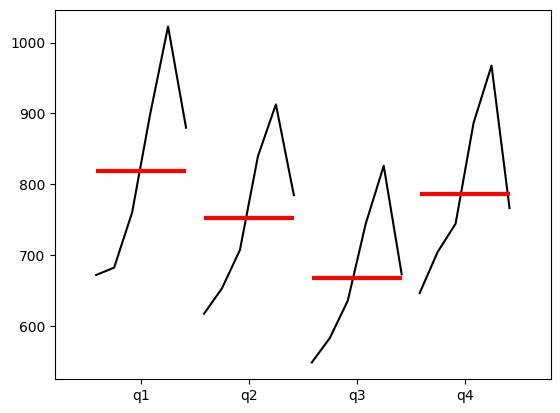

In [37]:
# Seasonal Graphs
month_plot(df.y.resample(rule='MS').mean());
quarter_plot(df.y.resample(rule='Q').mean());

# Advanced Visualizations

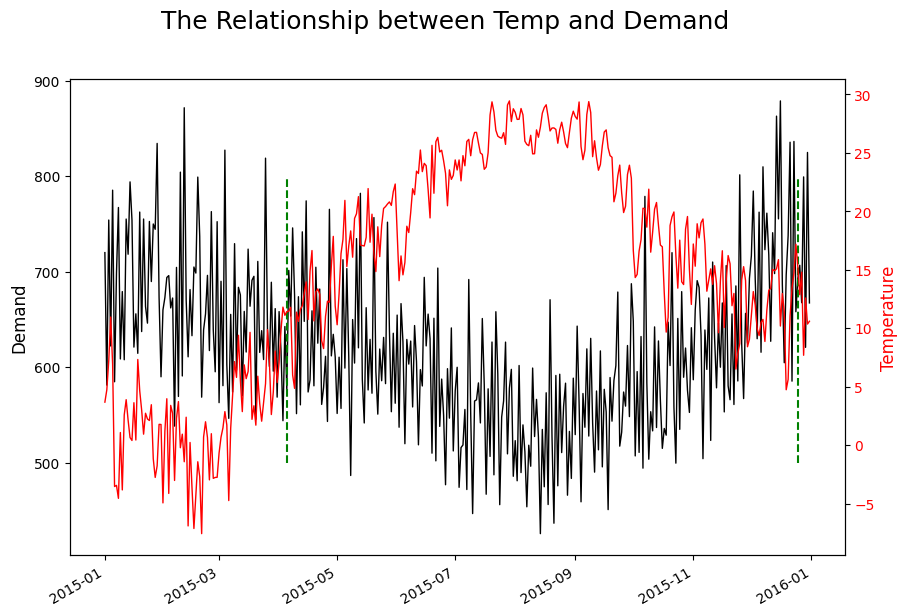

In [60]:
# Create a version B of the df
df_plt = df.loc['2015-01-01':'2015-12-31']

# Define the colors
temp_color = 'red'
y_color = 'black'

# plot
fig, ax1 = plt.subplots(figsize = (10,7))
ax2 = ax1.twinx()

# Data and Lines
ax1.plot(df_plt.index, df_plt.y, color = y_color, lw= 1)
ax2.plot(df_plt.index, df_plt.Temperature, color = temp_color, lw= 1)

# Title and Dates
fig.suptitle('The Relationship between Temp and Demand', fontsize = 18)
fig.autofmt_xdate()

# First axis
ax1.set_label("Date")
ax1.tick_params(axis = 'y', labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize=12)

# Second axis
ax2.tick_params(axis = 'y', labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize=12)

# Add Holidays/Events
events = df_plt[(df_plt.Easter == 1) | (df_plt.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax=800, color= 'green', ls = '--')

In [62]:
# correlation
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


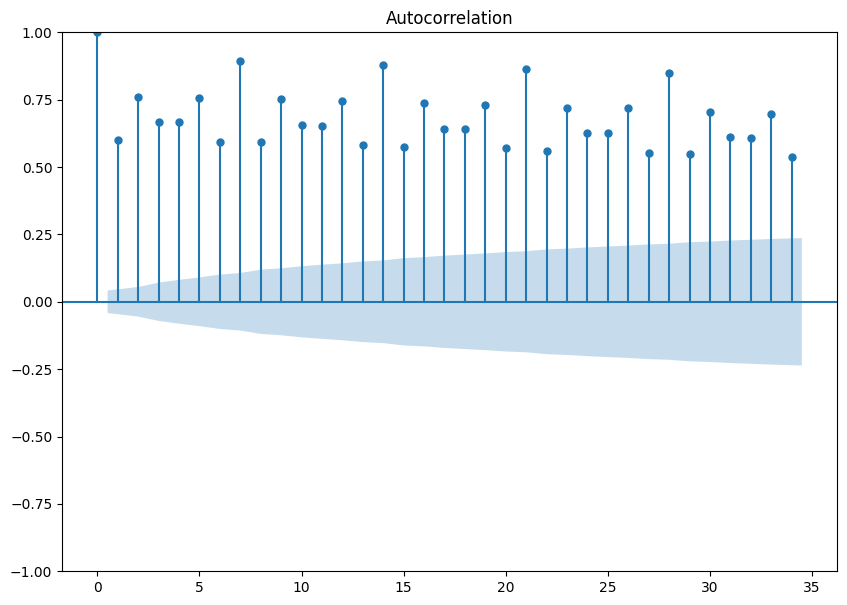

In [66]:
# ACF PLot
plt.rcParams['figure.figsize'] = (10,7)
plot_acf(df.y);